# Prosper Loan Data Analysis

# Deepak Sithu

## Table of Contents

* <a href="#overview">Overview</a>
* <a href="#initial">Initial Exploration</a>
* <a href="#clean">Data Cleaning</a>
* <a href="#univar">Univariate Exploration</a>
* <a href="#bivar">Bivariate Exploration</a>
* <a href="#multivar">Multivariate Exploration</a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

<a id="overview"></a>
## Overview

> This project is an examination of loan data from Prosper. The data set contains information for 

> From the guide: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I'm supposed to focus on about 10-15 of the variables. Example questions are, what factors affect a loan's outcome status? What affects the borrower's APR or interest rate? Are there differences between loans depending on how large the original loan amount was?

In [ ]:
# read in dataset
prosper_loan = pd.read_csv('prosperLoanData.csv')

<a id="initial"></a>
## Initial Exploration

In [ ]:
# get shape of dataframe and information for columns
print(prosper_loan.shape)
prosper_loan.info()

In [ ]:
# descriptions of numeric columns
prosper_loan.describe()

In [ ]:
# head of dataframe
prosper_loan.head()

### What is the structure of the dataset?

> The dataset is a series of loans with a large amount of associated data for each. One interesting aspect is that the credit grading system changed in July 2009, so credit ratings are split between the columns CreditGrade and ProsperRating (Alpha). It's clear from the initial exploration into the dataset that, both for ease of use and for the scope of this project it is best to eliminate several of the columns which are not going to be relavent. 

### What are the main features of interest in the dataset?

> The main features of interest are the credit ratings, which are split between CreditGrade and ProsperRating (Alpha), the LoanStatus, the BorrowerAPR, and the BorrowerRate. It will be interesting to see what, if any of the other variables in the dataset are correlated with differences in the previously mentioned features. Many of these are features which are  determined by the loan company, and therefore out of the control of the borrower, so seeing the relationship between these and variables which are more borrower-based will provide an insight into what goes into determining the specifics of a loan.

### What features in the dataset do you think will help support your investigation into the features of interest?

> The features which will be explored to see if they support an investigation into the features of interest are Term, ListingCategory, BorrowerState, EmploymentStatus, IsBorrowerHomeowner, OpenCreditLines, TotalCreditLinespast7years, DebtToIncomeRatio, and IncomeRange.

<a id="clean"></a>
## Data Cleaning

### Issues
* There are several columns in the dataset which are unnecessary or outside of the scope of this project.
* The column name ProsperRating (Alpha) affects ease of use of the dataset.
* The column ListingCategory (numeric) only has numeric values representing each listing type, but it would be more meaningful to include the actual listing types.
* The credit rating is split between the columns CreditGrade and ProsperRating, but would be useful as a single column, CreditRating.

#### Issue: There are several columns in the dataset which are unnecessary or outside of the scope of this project.

In [ ]:
# create a copy of the dataframe with only columns the of interest and confirm change
prosper_clean = prosper_loan[['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 'OpenCreditLines', 'TotalCreditLinespast7years', 'DebtToIncomeRatio', 'IncomeRange']].copy()
print(prosper_clean.shape)
prosper_clean.head()

#### Issue: The column name ProsperRating (Alpha) affects ease of use of the dataset.

In [ ]:
# rename ProsperRating (Alpha) and confirm change
prosper_clean = prosper_clean.rename(columns={'ProsperRating (Alpha)' : 'ProsperRating'});
prosper_clean.head()

#### Issue: The column ListingCategory (numeric) only has numeric values representing each listing type, but it would be more meaningful to include the actual listing types.

In [ ]:
# create empty column ListingCategory to replace ListingCategory (numeric)
prosper_clean['ListingCategory'] = ""

In [ ]:
# loop through dataset to fill ListingCategory based on ListingCategory (numeric)
for i in range(len(prosper_clean)):
    num = prosper_clean['ListingCategory (numeric)'][i]
    if num == 0:
        prosper_clean.at[i, 'ListingCategory'] = 'Not Available'
    elif num == 1:
        prosper_clean.at[i, 'ListingCategory'] = 'Debt Consolidation'
    elif num == 2:
        prosper_clean.at[i, 'ListingCategory'] = 'Home Improvement'
    elif num == 3:
        prosper_clean.at[i, 'ListingCategory'] = 'Business'
    elif num == 4:
        prosper_clean.at[i, 'ListingCategory'] = 'Personal Loan'
    elif num == 5:
        prosper_clean.at[i, 'ListingCategory'] = 'Student Use'
    elif num == 6:
        prosper_clean.at[i, 'ListingCategory'] = 'Auto'
    elif num == 7:
        prosper_clean.at[i, 'ListingCategory'] = 'Other'
    elif num == 8:
        prosper_clean.at[i, 'ListingCategory'] = 'Baby/Adoption'
    elif num == 9:
        prosper_clean.at[i, 'ListingCategory'] = 'Boat'
    elif num == 10:
        prosper_clean.at[i, 'ListingCategory'] = 'Cosmetic Procedure'
    elif num == 11:
        prosper_clean.at[i, 'ListingCategory'] = 'Engagement Ring'
    elif num == 12:
        prosper_clean.at[i, 'ListingCategory'] = 'Green Loans'
    elif num == 13:
        prosper_clean.at[i, 'ListingCategory'] = 'Household Expenses'
    elif num == 14:
        prosper_clean.at[i, 'ListingCategory'] = 'Large Purchases'
    elif num == 15:
        prosper_clean.at[i, 'ListingCategory'] = 'Medical/Dental'
    elif num == 16:
        prosper_clean.at[i, 'ListingCategory'] = 'Motorcycle'
    elif num == 17:
        prosper_clean.at[i, 'ListingCategory'] = 'RV'
    elif num == 18:
        prosper_clean.at[i, 'ListingCategory'] = 'Taxes'
    elif num == 19:
        prosper_clean.at[i, 'ListingCategory'] = 'Vacation'
    else:
        prosper_clean.at[i, 'ListingCategory'] = 'Wedding Loans'

In [ ]:
# remove ListingCategory (numeric) from clean dataframe and confirm changes
prosper_clean = prosper_clean.drop('ListingCategory (numeric)', axis = 1)
prosper_clean.head()

#### Issue: The credit rating is split between the columns CreditGrade and ProsperRating, but would be useful as a single column, CreditRating.

In [ ]:
# create two lists of the ListingKeys for non-null values for CreditGrade and ProsperRating
credit_grade_keys = prosper_clean.ListingKey[prosper_clean['CreditGrade'].notnull()].tolist();
prosper_rating_keys = prosper_clean.ListingKey[prosper_clean['ProsperRating'].notnull()].tolist();

In [ ]:
# use python in and loop to check if any value in credit_grade_list is in prosper_rating_list
double_rating_keys = []
for i in range(len(credit_grade_keys)):
    if credit_grade_keys[i] in prosper_rating_keys:
        double_rating_keys.append(credit_grade_keys[i])
        print(credit_grade_keys[i])

In [ ]:
# confirm double_rating_keys is empty
double_rating_keys

In [ ]:
# create empty CreditRating column to be filled by CreditGrade and ProsperRating
prosper_clean['CreditRating'] = "" 

In [ ]:
# loop to fill CreditRating for CreditGrade values
for i in range(len(credit_grade_keys)):
    listing_row = (prosper_clean[prosper_clean['ListingKey'] == credit_grade_keys[i]])
    index = int(listing_row.index.values)
    prosper_clean.at[index, 'CreditRating'] = listing_row.CreditGrade.values[0]

In [ ]:
# loop to fill CreditRating for ProsperRating values
for i in range(len(prosper_rating_keys)):
    listing_row = (prosper_clean[prosper_clean['ListingKey'] == prosper_rating_keys[i]])
    index = int(listing_row.index.values[0:1])
    prosper_clean.at[index, 'CreditRating'] = listing_row.ProsperRating.values[0]

In [ ]:
# fill in empty CreditRatings as NC and confirm change
prosper_clean.CreditRating = prosper_clean.CreditRating.replace('', 'NC');
prosper_clean.head()

In [325]:
# create dataset with only Past Due statuses for LoanStatus
prosper_pastdue_clean = prosper_clean[prosper_clean['LoanStatus'].isin(['Past Due (1-15 days)', 
                                                      'Past Due (16-30 days)', 
                                                      'Past Due (31-60 days)', 
                                                      'Past Due (61-90 days)',
                                                      'Past Due (91-120 days)',
                                                      'Past Due (>120 days)'])]

### Storing

In [327]:
# create cleaned files if it doesn't already exist
if not os.path.exists('prosper_clean.csv'):
    prosper_clean.to_csv('prosper_clean.csv', index = False)

if not os.path.exists('prosper_pastdue_clean.csv'):
    prosper_pastdue_clean.to_csv('prosper_pastdue_clean.csv', index = False)

### Finalizing Dataset

In [328]:
# read in cleaned datasets
prosper = pd.read_csv('prosper_clean.csv')
prosper_pastdue = pd.read_csv('prosper_pastdue_clean.csv')

In [335]:
# turn CreditGrade, ProsperRating, IncomeRange, CreditRating, and LoanStatus into ordered categorical type variables and confirm change
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                   'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'CreditRating': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'LoanStatus': ['Completed', 'Current', 'FinalPaymentInProgress', 'Chargedoff', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                               categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)
    
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingKey                    113937 non-null object
CreditGrade                   28953 non-null category
Term                          113937 non-null int64
LoanStatus                    113937 non-null category
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
ProsperRating                 84853 non-null category
BorrowerState                 108422 non-null object
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
OpenCreditLines               106333 non-null float64
TotalCreditLinespast7years    113240 non-null float64
DebtToIncomeRatio             105383 non-null float64
IncomeRange                   113937 non-null category
ListingCategory               113937 non-null object
CreditRating                  113937 non-null category
dtypes: bool(1), category(5), f

In [336]:
# for prosper_pastdue turn CreditGrade, ProsperRating, IncomeRange, CreditRating, and LoanStatus into ordered categorical type variables and confirm change
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                   'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'CreditRating': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'LoanStatus': ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                               categories = ordinal_var_dict[var])
    prosper_pastdue[var] = prosper_pastdue[var].astype(ordered_var)
    
prosper_pastdue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 16 columns):
ListingKey                    2067 non-null object
CreditGrade                   0 non-null category
Term                          2067 non-null int64
LoanStatus                    2067 non-null category
BorrowerAPR                   2067 non-null float64
BorrowerRate                  2067 non-null float64
ProsperRating                 2067 non-null category
BorrowerState                 2067 non-null object
EmploymentStatus              2067 non-null object
IsBorrowerHomeowner           2067 non-null bool
OpenCreditLines               2067 non-null float64
TotalCreditLinespast7years    2067 non-null float64
DebtToIncomeRatio             1857 non-null float64
IncomeRange                   2067 non-null category
ListingCategory               2067 non-null object
CreditRating                  2067 non-null category
dtypes: bool(1), category(5), float64(5), int64(1), object(4)
memory

In [362]:
# create dataframes separated by whether they have CreditGrade or ProsperRating and confirm expected sizes
credit_grade_keys = prosper.ListingKey[prosper['CreditGrade'].notnull()].tolist();
prosper_rating_keys = prosper.ListingKey[prosper['ProsperRating'].notnull()].tolist();
prosper_pre09 = prosper[prosper['ListingKey'].isin(credit_grade_keys)]
prosper_post09 = prosper[prosper['ListingKey'].isin(prosper_rating_keys)]
print(prosper_pre09.shape, prosper_post09.shape)

(28953, 16) (84853, 16)


In [331]:
# use describe for additional information on finalized numeric variables
prosper.describe()

,Term,BorrowerAPR,BorrowerRate,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio
count,113937.000000,113912.000000,113937.000000,106333.000000,113240.000000,105383.000000
mean,40.830248,0.218828,0.192764,9.260164,26.754539,0.275947
std,10.436212,0.080364,0.074818,5.022644,13.637871,0.551759
min,12.000000,0.006530,0.000000,0.000000,2.000000,0.000000
25%,36.000000,0.156290,0.134000,6.000000,17.000000,0.140000
50%,36.000000,0.209760,0.184000,9.000000,25.000000,0.220000
75%,36.000000,0.283810,0.250000,12.000000,35.000000,0.320000
max,60.000000,0.512290,0.497500,54.000000,136.000000,10.010000


In [332]:
# use shape and head for additional overview information to confirm all changes have been made to cleaned dataset
print(prosper.shape)
prosper.head()

(113937, 16)


,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,ListingCategory,CreditRating
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999",Not Available,C
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999",Home Improvement,A
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,GA,Not available,False,NaN,3.0,0.06,Not displayed,Not Available,HR
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999",Motorcycle,A
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,MN,Employed,True,19.0,49.0,0.26,"$100,000+",Home Improvement,D


#### Variable Key:
* **ListingKey** - A unique key for each listing
* **CreditGrade** - The credit rating assigned at the time of listing for listings before July 2009 (then replaced by ProsperRating)
* **Term** - The length of the loan in months
* **LoanStatus** - The current status of the loan
* **BorrowerAPR** - The borrower's annual percentage rate (APR) for the loan
* **BorrowerRate** - The borrower's interest rate for the loan
* **ProsperRating** - The Prosper Rating assigned at the time of listing for listings after July 2009
* **BorrowerState** - The two letter abbreviation of the state of the address of the borrower
* **EmploymentStatus** - The employment status of the borrower
* **IsBorrowerHomeowner** - Whether the borrower has a mortgage on their credit profile or have provided documentation proving homeownership
* **OpenCreditLines** - The number of open credit lines on the credit profile
* **TotalCreditLinespast7years** - The number of credit lines in the past seven years on the credit profile
* **DebtToIncomeRatio** - The debt to income ratio of the borrower which is null if not available and capped at 10.01
* **IncomeRange** - The income range of the borrower
* **ListingCategory** - The category of the listing the borrower selected
* **CreditRating** - The combined columns of CreditGrade and ProsperRating, filling in NC for null values

<a id="univar"></a>
## Univariate Exploration

In [6]:
# get base seaborn color to simplify color scheme of plots
base = sns.color_palette()[0]

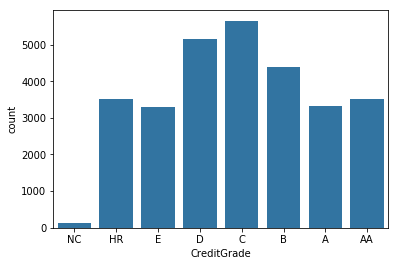

In [337]:
# bar chart for count of listings by CreditGrate
sns.countplot(data = prosper, x = 'CreditGrade', color = base);

> CreditGrade shows a peak in 'C' grade listings, so finding factors which correlate with a 'C' grade could provide insight into why this peak exists.

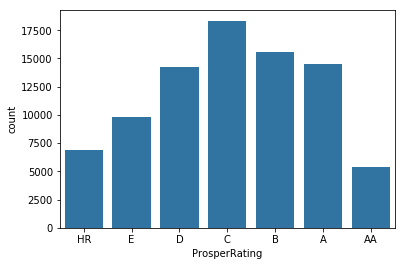

In [338]:
# bar chart of count of listings by ProsperRating
sns.countplot(data = prosper, x = 'ProsperRating', color = base);

> ProsperRating interestingly seems to have proportionally far fewer 'AA' ratings compared to CreditGrade, which actually had more 'AA' ratings than 'A' ratings. It's possible that different kinds of listings were pursued or accepted after the switch to ProsperRatings, so seeing if any factors are seen in different distributions between listings with a ProsperRating vs. CreditGrade could help in understanding this.

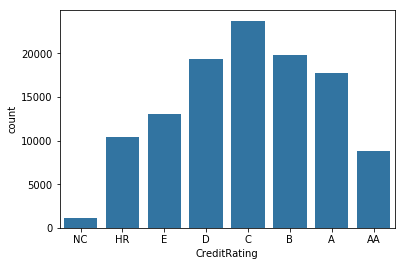

In [339]:
# bar chart of CreditRating, showing very similar results as ProsperRating
sns.countplot(data = prosper, x = 'CreditRating', color = base);

> The combined column CreditRating has a similar shape to ProsperRating, influenced by there being more listings with ProsperRatings in the dataset.

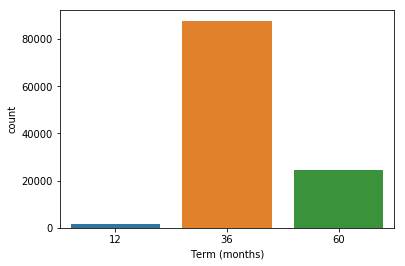

In [340]:
# bar chart for count of listings by Term 
sns.countplot(data = prosper, x = 'Term');
plt.xlabel('Term (months)');

> The vast majority of listings are for 36 months, or three years. It could provide insight to look into what factors correlate with the other two terms, 12 and 60 months, to see if only a certain type of listing gets put into those categories. 

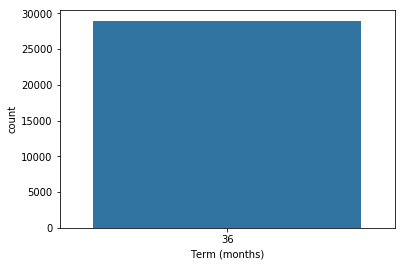

In [341]:
# bar chart for count of listings pre-2009 by Term
sns.countplot(data = prosper_pre09, x = 'Term');
plt.xlabel('Term (months)');

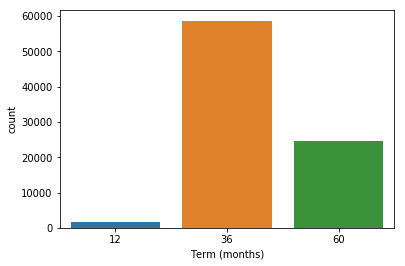

In [342]:
# bar chart for count of listings post-2009 by Term
sns.countplot(data = prosper_post09, x = 'Term');
plt.xlabel('Term (months)');

> All of the listings with CreditGrades were for 36 months, and it was only after the switch to ProsperRatings that the dataset included 12 and 60 month listings.

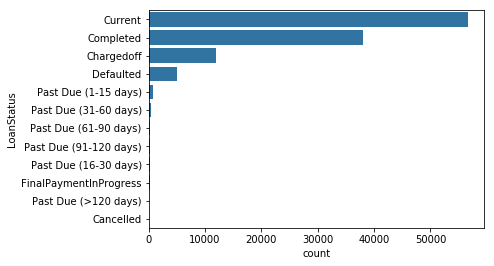

In [343]:
# bar plot of count of listings by LoanStatus ordered by count
loan_stat_order = prosper['LoanStatus'].value_counts().index
sns.countplot(data = prosper, y = 'LoanStatus',
              color = base,
              order = loan_stat_order);

> The vast majority of listings are current or completed, through because of this it may be worth seeing the distribution of past due accounts only.

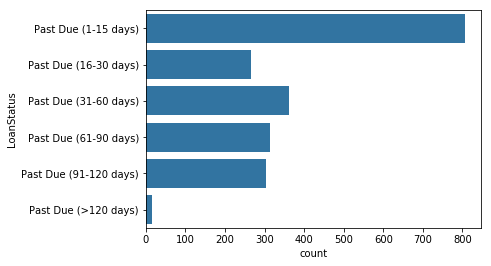

In [344]:
# bar chart of count of listings by LoanStatus for just past due loans ordered by past due categories
sns.countplot(data = prosper_pastdue, y = 'LoanStatus', color = base);

> The chart shows the majority of past due listings are within the 1-15 day period, but that there's also a relative peak at 31-60, with very few listings in the final, >120 days category.

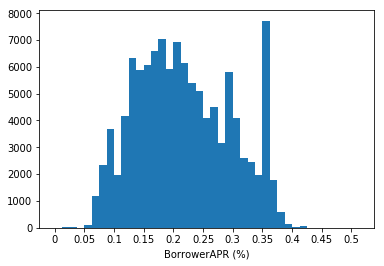

In [345]:
# histogram of BorrowerAPR with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.51 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerAPR (%)');

In [346]:
# finding exact value of peak of distribution
prosper.BorrowerAPR.mode()

0    0.35797
dtype: float64

> The Borrower APR graph shows a slightly right skewed distribution, except with several large spikes in values. The largest one being at 0.35797, based on the mode for the values. It would be worthwhile to see what other factors correlate with this APR.

0    0.37453
dtype: float64


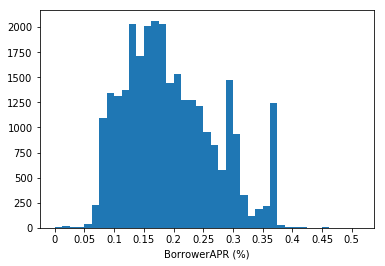

In [347]:
# mode for pre-2009 BorrowerAPR
print(prosper_pre09.BorrowerAPR.mode())

# histogram of pre-2009 BorrowerAPR with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.51 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper_pre09, x = 'BorrowerAPR', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerAPR (%)');

> Interestingly this distribution has less dramatic peaks compared to the full dataset, though the mode at 0.37353 is relatively close to the overall mode.

0    0.35797
dtype: float64


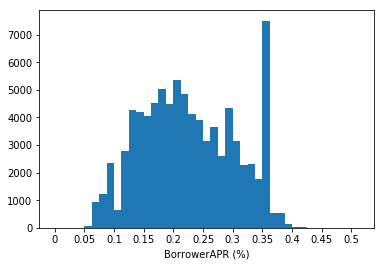

In [348]:
# mode for post-2009 BorrowerAPR
print(prosper_post09.BorrowerAPR.mode())

# histogram of post-2009 BorrowerAPR with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.51 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper_post09, x = 'BorrowerAPR', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerAPR (%)');

> Here it's clear that the mode of 0.35797 became so common after the switch from CreditGrades to ProsperRatings. Looking into more factors that correlate with this shift could provide more insights into its cause.

0    0.3177
dtype: float64


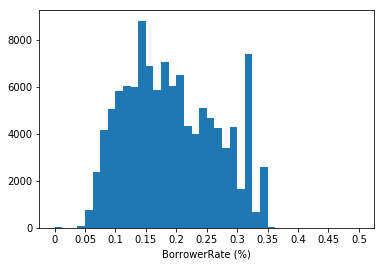

In [349]:
# mode for BorrowerRate
print(prosper.BorrowerRate.mode())

# histogram of Borrower Rate with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.5 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper, x = 'BorrowerRate', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerRate (%)');

> For BorrowerRate there is a relatively similar looking distribution to the BorrowerAPR, where there's a right skewed distribution with a very large peak to the right of mean. The mode for this distribution is the peak at 0.3177.

0    0.29
dtype: float64


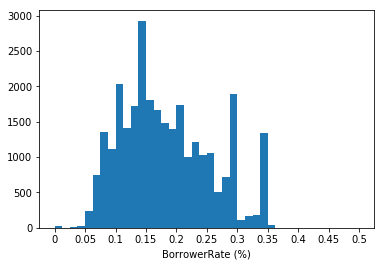

In [33]:
# mode for BorrowerRate
print(prosper_pre09.BorrowerRate.mode())

# histogram of Borrower Rate with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.5 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper_pre09, x = 'BorrowerRate', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerRate (%)');

0    0.3177
dtype: float64


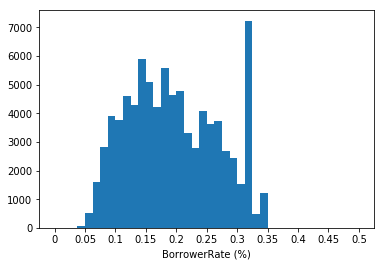

In [34]:
# mode for BorrowerRate
print(prosper_post09.BorrowerRate.mode())

# histogram of Borrower Rate with set bins and xticks
inc = 0.0125
bins = np.arange(0, 0.5 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper_post09, x = 'BorrowerRate', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerRate (%)');

> Again, similar to the results when separating the pre and post-2009 datasets for BorrowerAPR, the mode for BorrowerRate was only established after the switch to ProsperRatings.

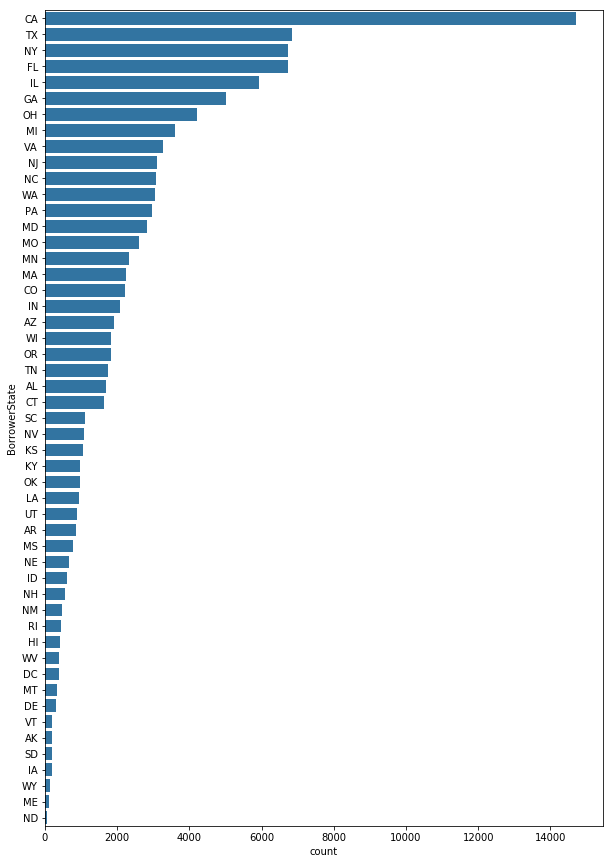

In [350]:
# bar chart of ordered listing count by BorrowerState with adjusted figsize
state_order = prosper['BorrowerState'].value_counts().index
plt.figure(figsize = (10,15))
sns.countplot(data = prosper, y = 'BorrowerState', color = base, order = state_order);

> The vast majority of listings are from California, with the next highest being from Texas, New York, and Florida. Although it's not within the scope of this project, it could be useful to adjust these values by state population size, or finding some way of taking into account where the company Prosper is located.

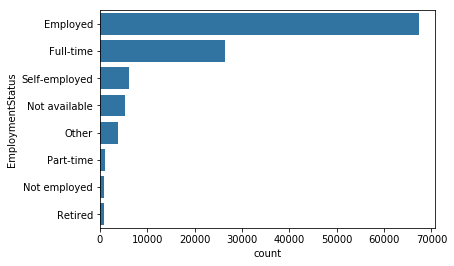

In [351]:
# bar chart of ordered listing count by EmploymentStatus
employment_order = prosper['EmploymentStatus'].value_counts().index
sns.countplot(data = prosper, y = 'EmploymentStatus', color = base, order = employment_order);

> The bar chart shows unsurprisingly that the majority of listings are for people who are employed. Looking into any correlations between other variables and a person being self-employed, part-time, not employed, or retired could provide useful information.

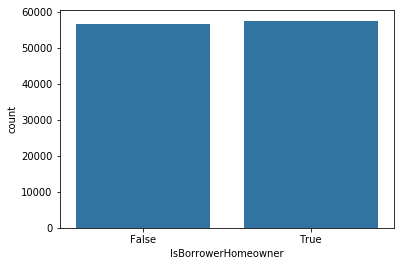

In [352]:
# bar chart of listing count by IsBorrowerHomeowner
sns.countplot(data = prosper, x = 'IsBorrowerHomeowner', color = base);

> Interestingly, the split between whether a listing is from a homeowner or not is extremely close when displayed visually, though with more homeowners than non-homeowners. Seeing if there are any factors which trend with one or the other could provide useful information for this analysis.

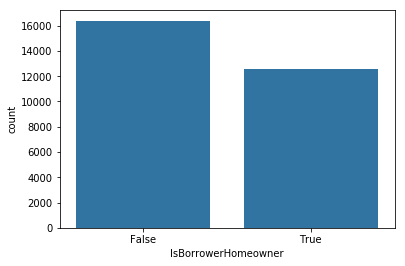

In [353]:
# bar chart of pre-2009 listing count by IsBorrowerHomeowner 
sns.countplot(data = prosper_pre09, x = 'IsBorrowerHomeowner', color = base);

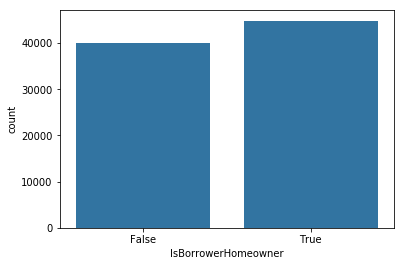

In [354]:
# bar chart of post-2009 listing count by IsBorrowerHomeowner
sns.countplot(data = prosper_post09, x = 'IsBorrowerHomeowner', color = base);

> In these two bar charts it becomes apparant that there was also a shift from more listings being made by non-homeowner to homeowner around the switch from CreditGrades to ProsperRatings.

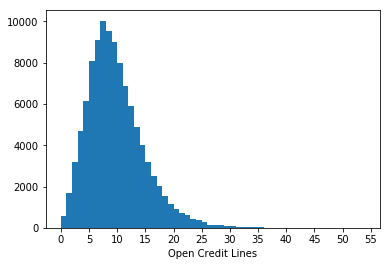

In [355]:
# histogram of OpenCreditLines with set bins and xticks
inc = 1
bins = np.arange(0, 54 + inc, inc)
xlocs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
plt.hist(data = prosper, x = 'OpenCreditLines', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('Open Credit Lines');

> The histogram of OpenCreditLines shows an extremely smooth, slightly right-skewed distribution with a peak at seven. It would be interesting to see what other factors affect this distribution.

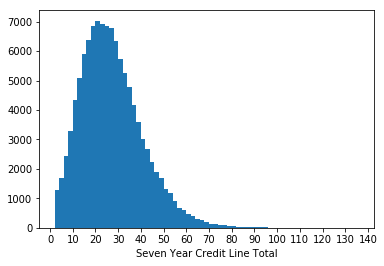

In [356]:
# histogram of TotalCreditLinespast7years with set bins and xticks
inc = 2
bins = np.arange(2, 136 + inc, inc)
xlocs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
plt.hist(data = prosper, x = 'TotalCreditLinespast7years', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('Seven Year Credit Line Total');

> Similar to the OpenCreditLines histogram, the TotalCreditLinespast7years shows a very smooth, right-skewed distribution with a peak at 21.

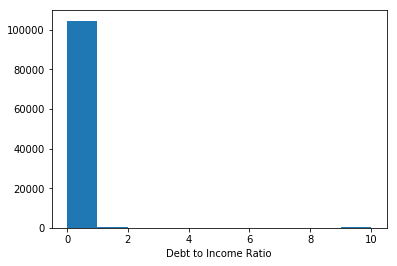

In [358]:
# histogram of DebtToIncomeRatio
plt.hist(data = prosper, x = 'DebtToIncomeRatio', color = base);
plt.xlabel('Debt to Income Ratio');

> This histogram for DebtToIncomeRatio shows nearly all values are between zero and one, but there are also some values around 10 which are throwing off the visualization, so it would be worth trying a log scaling to better view this data.

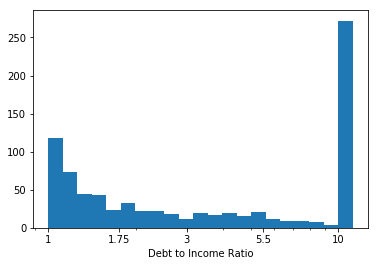

In [359]:
# histogram of DebtToIncomeRatio with Log scaling and set bins and xticks
inc = 0.05
bins = 10 ** np.arange(0, 1.000434 + inc, inc)
xlocs = [1, 1.75, 3, 5.5, 10]
labels = ['{}'.format(v) for v in xlocs]
plt.hist(data = prosper, x = 'DebtToIncomeRatio', color = base, bins = bins);
plt.xscale('log');
plt.xticks(xlocs, labels);
plt.xlabel('Debt to Income Ratio');

> This version of the DebtToIncomeRatio histogram with log scaling shows the right skewed distribution better, and better illustrates the peak at 10.1 which is caused by the dataset capping DebtToIncomeRatio values at 10.1.

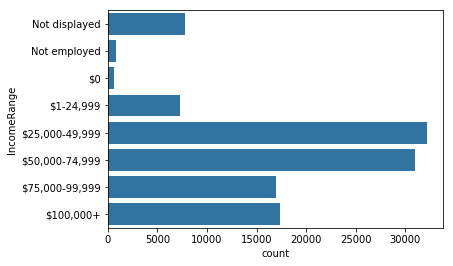

In [360]:
# bar chart of IncomeRange
sns.countplot(data = prosper, y = 'IncomeRange', color = base);

> The bar chart shows the most listings are for people in the \\$25,000-49,999 range. There is also a small increase at the highest range, but that may be due to it being the cap and so there's a larger range of incomes being put into that one category. Seeing how IncomeRange correlates with other factors should provide some insights into the dataset.

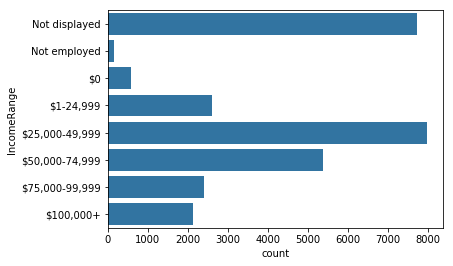

In [363]:
# bar chart of pre-2009 IncomeRange
sns.countplot(data = prosper_pre09, y = 'IncomeRange', color = base);

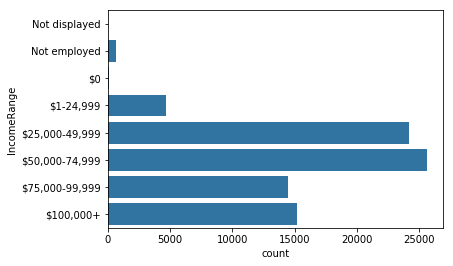

In [364]:
# bar chart of post-2009 IncomeRange
sns.countplot(data = prosper_post09, y = 'IncomeRange', color = base);

> Notably in the CreditGrade data the two most populous values are in the \\$25,000-49,999 range and not displayed, meaning likely that information was kept confidential from the dataset. However in the ProsperRating data the most populous values are more closely aligned with the overall data, but actually have slightly more listings in the \\$50,000-74,999 range compared to \\25,000-49,999. 

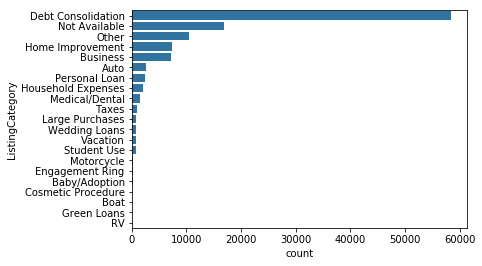

In [365]:
# bar chart of ListingCategory ordered by count
listing_order = prosper['ListingCategory'].value_counts().index
sns.countplot(data = prosper, y = 'ListingCategory', color = base, order = listing_order);

> The bar chart shows the vast majority or listings are for Debt Consolidation. Seeing what factors correlate with this and the other factors such as Home Improvement and Business could provide insights into the dataset.

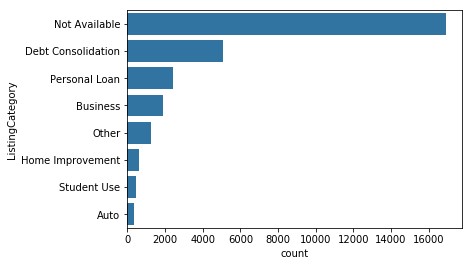

In [74]:
# bar chart of pre-2009 ListingCategory ordered by count
listing_order = prosper_pre09['ListingCategory'].value_counts().index
sns.countplot(data = prosper_pre09, y = 'ListingCategory', color = base, order = listing_order);

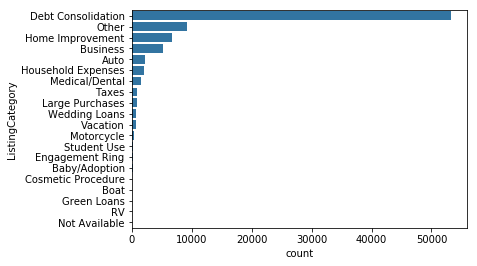

In [73]:
# bar chart of post-2009 ListingCategory ordered by count
listing_order = prosper_post09['ListingCategory'].value_counts().index
sns.countplot(data = prosper_post09, y = 'ListingCategory', color = base, order = listing_order);

> Here it becomes clear that the second highest value in the overall barchart, Not Available, actually comes from the CreditGrade data. It seems that the CreditGrade data in general contains less information about the listings and the people involved compared to the ProsperRating data.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

> For the variable CreditRating, it was shown that the rating with the highest count was 'C' rated listings, though there was a noticable drop in the proportion of 'AA' rated listings when comparing the CreditGrade data to the ProsperRating data. The overall LoanStatus distribution was unsurprising in that the majority of listings were current or completed. When looking into just the past due listings by creating a separate dataframe, it was notworthy that the majority of them were in the 1-15 day range, and that there was also a slight increase in the 31-60 day range. BorrowerAPR was notable for having a slightly right skewed distribution with a large spike at the mode of 0.35797, which will be a point to look into further. It was interesting to see that this particular value only became the mode after the switch to ProsperRatings as well. BorrowerAPR took on a similar distribution to BorrowerAPR, this time with an unusual peak at the mode of 0.3177, which could be a default value under certain circumstances for listings. Here again it was interesting to note that this mode value only became such in the later ProserRating data, not the CreditGrades.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For all of the plots a base color from seaborn was used to prevent the chart junk of multicolored univariate graphs. Several bar charts were more legible being oriented horizontally due to the number of categories the variable held, as well as the length of the names of the categories. Several histograms also required set bins and x-axis tick labels and locations for better visualization of the data. DebtToIncomeRatio had a very noteworthy distribution, with the majority of listings being between zero and one values, but there being a right skew that was capped at 10.1, and because of the cap this caused a spike in values at 10.1, which required a log scaling to visualize in a meaningful way.

> Early on the data which included CreditGrades versus ProsperRatings were separated into two dataframes. This was because the credit rating system Prosper used switch from CreditGrade to ProsperRating in July 2009, but notably it was found that there were also differences in the distributions of many variables which correlated with this change. For Term it was found that the vast majority of listings were for 36 months, and that before July 2009 all listings were for 36 months. The chart of whether a borrower was a homeowner was surprisingly close, with a slight preference towards homeowners, though interestingly this trend was the reverse by a proportionally wider margin in the pre July 2009 data. IncomeRange was highest in the \\$25,000-49,999 and \\$50,000-74,999 range, but notably a significant amount of the pre July 2009 data had 'not displayed' in this category compared to after July 2009. Similarly ListingCategory had similar results, where the vast majority of listings overall were for debt consolidation, but in the CreditGrade data the most common category was 'not available'.

>The largest amount of listings were made in California, but it's unlikely that this information is that noteworthy simply because there are too many factors such as state population size, the years of business Prosper has conducted in each state, and state population incomes that could affect this trend. EmploymentStatus was also a relatively unsurprising chart as most of the people were employed or labelled as full-time. Both OpenCreditLines and TotalCreditLinespast7years showed extremely smooth, slightly right skewed distributions, which would be interesting to break down by other factors to see what they are affected by.

<a id="bivar"></a>
## Bivariate Exploration

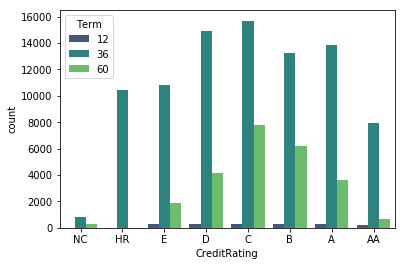

In [366]:
# clustered bar chart of Term by CreditRating
sns.countplot(data = prosper, x = 'CreditRating', hue = 'Term', palette = 'viridis');
plt.legend(title = 'Term', loc = 2);

> The chart shows that for both 36 and 60 month term listings there was a correlation with C ratings. There are so few 12 month listings that there is virtually no difference in rating for them. It does appear that there were not any high risk loans made for 12 or 60 months.

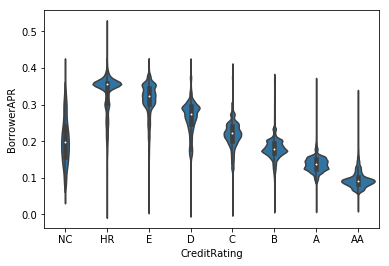

In [367]:
# violin plot of BorrowerAPR by CreditRating
sns.violinplot(data = prosper, x = 'CreditRating', y = 'BorrowerAPR', color = base);

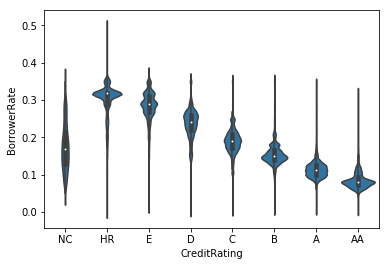

In [133]:
# violin plot of BorrowerRate by CreditRating
sns.violinplot(data = prosper, x = 'CreditRating', y = 'BorrowerRate', color = base);

> These two violin plots breaking down BorrowerAPR and BorrowerRate by CreditRating show in both cases very clear inverse relationships between the factors. The higher CreditRatings predominantly correlated with lower APRs and rates.

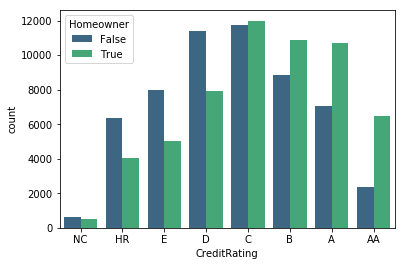

In [368]:
# clustered bar chart of CreditRating by IsBorrowerHomeowner
sns.countplot(data = prosper, x = 'CreditRating', hue = 'IsBorrowerHomeowner', palette = 'viridis');
plt.legend(title = 'Homeowner');

> The bar chart shows that the higher the rating, the greater proportion of loans are for homeowners. This suggests a correlation between homeownership and credit rating. Interestingly the point at which the probability of a listing being for a homeowner changes from less likely to more likely at the C rating, which is also the most common rating. At that point there is nearly an equal percentage of homeowners and non-homeowners. 

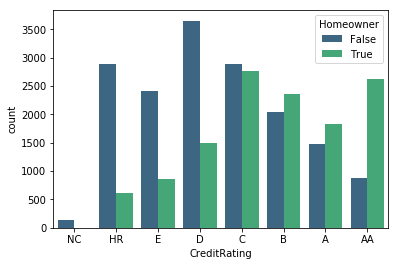

In [290]:
# clustered bar chart of CreditRating by IsBorrowerHomeowner for pre-2009 data
sns.countplot(data = prosper_pre09, x = 'CreditRating', hue = 'IsBorrowerHomeowner', palette = 'viridis');
plt.legend(title = 'Homeowner');

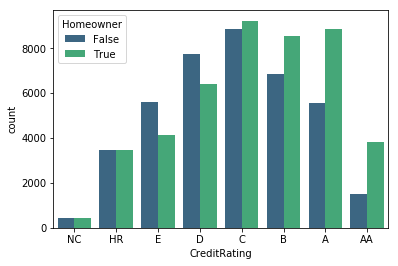

In [291]:
# clustered bar chart of CreditRating by IsBorrowerHomeowner for post-2009 data
sns.countplot(data = prosper_post09, x = 'CreditRating', hue = 'IsBorrowerHomeowner', palette = 'viridis');
plt.legend(title = 'Homeowner');

> Looking at the separated plots of CreditGrade to ProsperRating data, it's interesting to note that there are notable differences in the types of listings being made. In the pre-2009 data there is a trend towards larger numbers of listings at lower credit ratings by nonhomeowners and a bimodal trend among homeowners with peaks at the C and AA ratings. However these trends are not present in the post-2009 data, where both homeowner and nonhomeowner listings are most populous at the C rating, though there are a larger amount of higher rated listings amongst homeowners. 

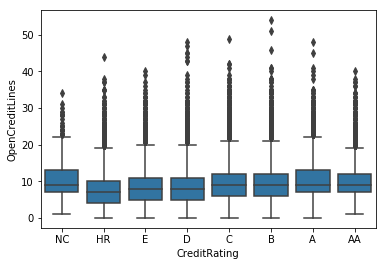

In [139]:
# boxplot of OpenCreditLines by CreditRating
sns.boxplot(data = prosper, x = 'CreditRating', y = 'OpenCreditLines', color = base);

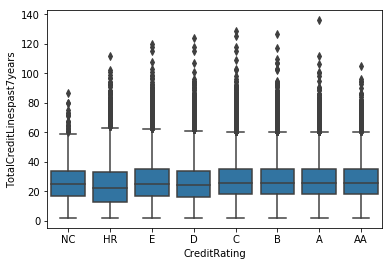

In [259]:
# boxplot of TotalCreditLinespast7years by CreditRating
sns.boxplot(data = prosper, x = 'CreditRating', y = 'TotalCreditLinespast7years', color = base);

> The two boxplots for OpenCreditLines and TotalCreditLinespast7years shows essentially no correlation between the number of credit lines and the rating of a listing.

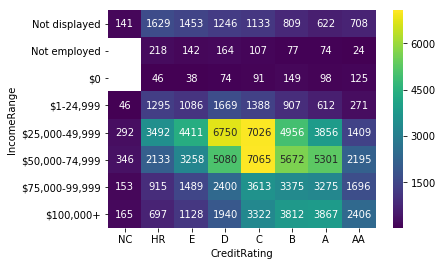

In [369]:
# heatmap of CreditRating and IncomeRange
ct_counts = prosper.groupby(['CreditRating', 'IncomeRange']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'CreditRating', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'n', cmap = 'viridis');

> The heatmap shows the majority of listings are C rated by people in the \\$25,000-49,999 and \\$50,000-74,999 ranges. It's not possible to draw larger conclusions from this finding, because there are many possible causes for this trend such as people in lower income ranges being less likely to be approved for loans at all. There are also interesting trends towards a predominance of listings with 'not displayed' incomes being high risk, and of incomes of \\$100,000+ being B or A rated.

In [269]:
# set LoanStatus as an ordered categorical type variable for consistency and legibility of visualizations
ordinal_var_dict = {]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                               categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

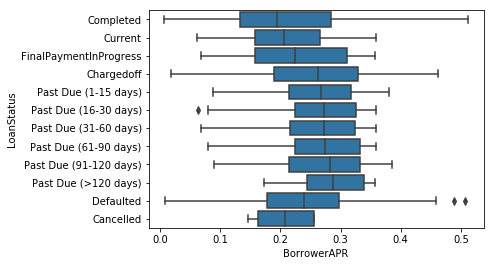

In [270]:
# boxplot of BorrowerAPR by LoanStatus
sns.boxplot(data = prosper, x = 'BorrowerAPR', y = 'LoanStatus', color = base);

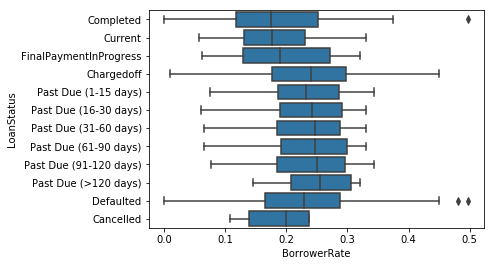

In [271]:
# boxplot of BorrowerRate by LoanStatus
sns.boxplot(data = prosper, x = 'BorrowerRate', y = 'LoanStatus', color = base);

> Similar to before the trends between BorrowerAPR and BorrowerRate are nearly identical. In these boxplots of BorrowerAPR and BorrowerRate broken down by LoanStatus it's clear that the distribution of rates is higher amongst loans which are past due by greater amounts. This is interesting and would require further investigation into how these rates are determined, as there does seem to be a correlation between a listing having a higher rate and being past due. 

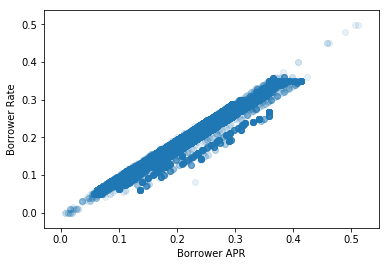

In [288]:
# scatterplot of BorrowerRate and BorrowerAPR
plt.scatter(data = prosper, x = 'BorrowerAPR', y = 'BorrowerRate', alpha = 0.1);
plt.xlabel('Borrower APR');
plt.ylabel('Borrower Rate');

> As suspected this scatter plot between BorrowerRate and BorrowerAPR showed an extremely strong positive relationship between the two variables. Although there is some amount of noise in the plot, investigating what goes into those subtle differences are outisde of the scope of this investigation.

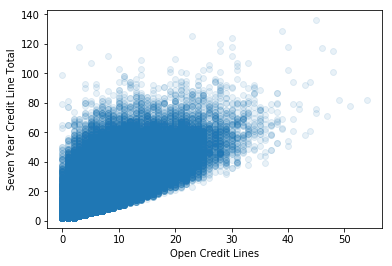

In [289]:
# scatterplot of OpenCreditLines and TotalCreditLinespast7years
plt.scatter(data = prosper, x = 'OpenCreditLines', y = 'TotalCreditLinespast7years', alpha = 0.1);
plt.xlabel('Open Credit Lines');
plt.ylabel('Seven Year Credit Line Total');

> Surprisingly there does seem to be a much greater distribution in the relationship between the number of OpenCreditLines and TotalCreditLinespast7years. While there does seem to be a positive relationship, it is nowhere near as tightly correlated as that between BorrowerRate and BorrowerAPR.

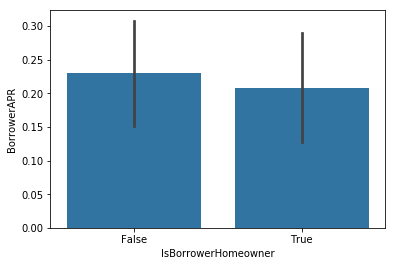

In [213]:
# whiskered bar chart of IsBorrowerHomeowner by BorrowerAPR
sns.barplot(data = prosper, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = base, ci = 'sd');

> The whiskered bar chart showing BorrowerAPR by IsBorrowerHomeowner shows a trend of lower APR's for homeowners, though this trend isn't that significant as seen by the relatively large standard deviations.

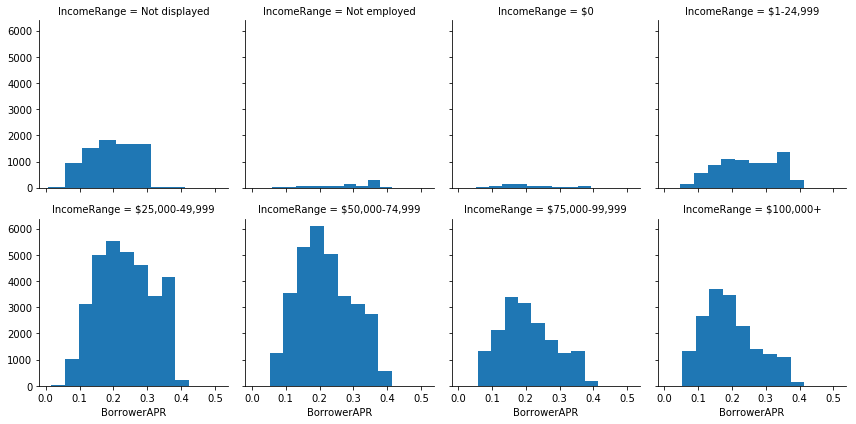

In [285]:
# facet grid of histograms of BorrowerAPR by IncomeRange
g = sns.FacetGrid(data = prosper, col = 'IncomeRange', col_wrap = 4);
g.map(plt.hist, 'BorrowerAPR');

> Surprisingly there doesn't seem to be a strong relationship between income and APR. The differences among the histograms are due to the differences in populations among the dataset in the various income categories, but all of them tend to peak around the 0.2 APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

> In the bivariate exploration of the dataset it was found that both listings of 36 and 60 month lengths were most commonly 'C' rated. There was no noticable trend among 12 month listings, though this may have been due to low population size for those kinds of loans. There was also a trend of borrower APR and rate's decreasing steadily with better ratings. In addition, listings in the 'NC' rating tended to have an APR and rate similar to the common 'C' rating. There was also a relationship between CreditRating and whether a loan was for a homeowner. The higher the rating the more likely it was that the loan was for a homeowner, and this then flipped to being less likely at the 'C' rating point going down.

> There was not found to be any significant trend or correlation between either the number of open credit lines or the seven year total numer of credit lines and the current credit rating. This is interesting because it seems plausible that having a greater numer of credit lines could possibly correlate with a higher risk factor for that individual, but that does not seem to be the case.

> There was a general trend towards loans which were past due, and past due by increasing amounts, having higher APRs and borrower rates. More research into how these rates are set would help in understanding this trend. It also became clear that the values of BorrowerAPR and BorrowerRate were tracking nearly the same variable, and a scatterplot of those two factors demonstrated an extremely high correlation with a positive relationship.

> BorrowerAPR also tended to be slightly lower for homeowners, potentially suggesting lower rates for better credit or higher incomes, but the trend was not very significant, as the whiskered bar chart included large standard deviation lines. Interestingly in a facetgrid breaking down BorrowerAPR by IncomeRange, there was not found to be a significant difference in rates based on income.


### Did you observe any interesting relationships between the other features (not the main features of interest)?

> Comparing the pre July 2009 CreditGrade data to the post July 2009 ProsperRating data and viewing CreditRatings by whether a listing was for a homeowner showed notable differences. In the CreditGrade data there was a trend towards large amounts of listings by non-homeowners with lower ratings peaking at the 'D' rating. The CreditGrade data also has the opposite trend amongst homeowners, with that value peaking at the 'AA' rating. These relationships did not exist in the ProsperRating data however, as here the data is more representative of the overall dataset itself with both homeowners and non-homeowner peaking at the 'C' rating. This again suggests some kind of shift in the kinds of loans which were being accepted around the time of the switch from CreditGrades to ProsperRatings.  Individuals in the \\$25,000-49,999 and \\$50,000-74,999 income ranges were also the most common to take out loans. Further investigation would need to be done into this however, because there are many possible factors that could affect the circumstances and types of people who would both seek out a loan and would be accepted for a loan which are outside of the scope of this project.

> Although it seemed that the factors of OpenCreditLines and TotalCreditLinespast7years might have the same relationship as BorrowerAPR and BorrowerRate, where they are so correlated that they are essentially measuring the same variable, there was much broader of a distribution between OpenCreditLines and TotalCreditLinespast7years when viewing them as a scatterplot. This suggest that there is more independence between these variables and not as much of a clear linear relationship.

* **ListingKey** - ID - full
* **CreditGrade** - ordered categorical (8) - missing 84,984
* **Term** - numeric discrete (3) - full
* **LoanStatus** - categorical (12) - full
* **BorrowerAPR** - numeric continuous - missing 25
* **BorrowerRate** - numeric continuous - full
* **ProsperRating** - ordered categorical (7) - missing 29,084
* **BorrowerState** - categorical (51) - missing 5,515 - can drop
* **EmploymentStatus** - categorical (8) - missing 2,255 - can drop
* **IsBorrowerHomeowner** - boolean - full
* **OpenCreditLines** - numeric discrete (52) - missing 7,604
* **TotalCreditLinespast7years** - numeric discrete (118) - missing 697
* **DebtToIncomeRatio** - numeric continuous - missing 8,554 (log scaling)
* **IncomeRange** - ordered categorical (8) - full
* **ListingCategory** - categorical (21) - full
* **CreditRating** - ordered categorical (8) - full

* heatmap scatterplot /heatmap - num / num / num 
* shaped/colored/faceted scatterplot - num / num / cat
* clus pointplot /clus whisk bar/ clus box- cat / num / cat
* alt heatmap - cat / cat / num
                          
CreditRating - cat
LoanStatus - cat
BorrowerAPR - num
IsBorrowerHomeowner - bool
OpenCreditLines - num
TotalCreditLinespast7years - num 
IncomeRange - cat

CreditRating - BorrowerAPR - LoanStatus - heatmap
CreditRating - BorrowerAPR - OpenCreditLines - scatter
CreditRating - BorrowerAPR - TotalCreditLinespast7years - scatter
CreditRating - BorrowerAPR - IsBorrowerHomeowner - heatmap
CreditRating - BorrowerAPR - IncomeRange - heatmap
CreditRating - IsBorrowerHomeowner - OpenCreditLines - heatmap
CreditRating - IsBorrowerHomeowner - TotalCreditLinespast7years - heatmap
CreditRating - IncomeRange - OpenCreditLines - heatmap
CreditRating - IncomeRange - TotalCreditLinespast7years - heatmap
BorrowerAPR - LoanStatus - OpenCreditLines - scatter
BorrowerAPR - LoanStatus - TotalCreditLinespast7years - scatter
BorrowerAPR - LoanStatus - IncomeRange - heatmap

<a id="multivar"></a>
## Multivariate Exploration

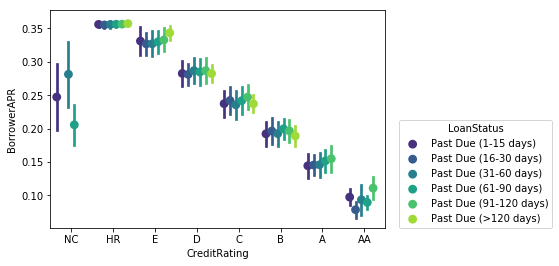

In [457]:
# pointplot of BorrowerAPR by CreditRating and LoanStatus for past-due loans
sns.pointplot(data = prosper_pastdue, x = 'CreditRating', y = 'BorrowerAPR', hue = 'LoanStatus', ci = 'sd', linestyles = '', dodge = 0.7, palette = 'viridis');
plt.legend(loc = (1.04, 0), title = 'LoanStatus');

> There was some information to be found in this pointplot which had BorrowerAPR's broken down by both CreditRating and then LoanStatus for past-due loans. Unsurprisingly some of the rating groups had upward trends by LoanStatus, meaning the longer they were past due the higher the APR rate. How far past due a loan will go is not something which can be determined beforehand, but a loan having a higher APR may be indicative of a greater risk of some sort, which would statistically lead to a greater chance of the loan going past due. This upward trend is seen in the AA and A rated loans and the E rated loans, however it does not seem to be the case in any of the other ratings, where there is a relatively flat distribution of APRs among that rating group.

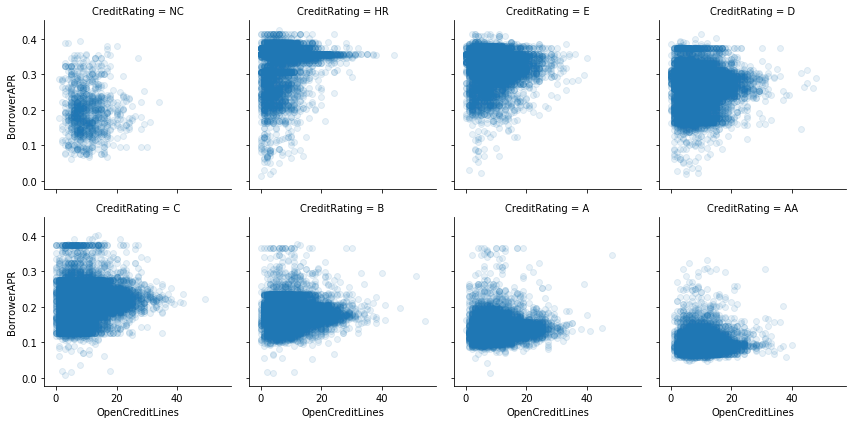

In [449]:
# facet grid for CreditRatings of scatterplots showing OpenCreditLines by BorrowerAPR 
g = sns.FacetGrid(data = prosper, col = 'CreditRating', col_wrap = 4)
g.map(plt.scatter, 'OpenCreditLines', 'BorrowerAPR', alpha = 0.1);

> The facet grid of scatterplots shows a trend that the higher the CreditRating, the lower the BorrowerAPR, but that there doesn't seem to be a strong correlation between these factors and the numer of OpenCreditLines. This is surprising because it would be plausible to think that the number of lines of credit a person has open would be indicative of their financial situation and decisions in a way that would affect their loans. However this does not seem to be the case.  

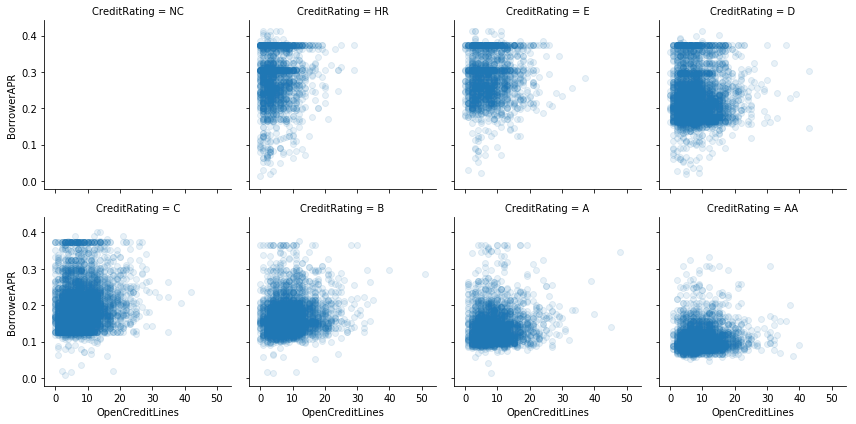

In [437]:
# facet grid for CreditRatings of scatterplots showing OpenCreditLines by BorrowerAPR for pre-2009 data
g = sns.FacetGrid(data = prosper_pre09, col = 'CreditRating', col_wrap = 4)
g.map(plt.scatter, 'OpenCreditLines', 'BorrowerAPR', alpha = 0.1);

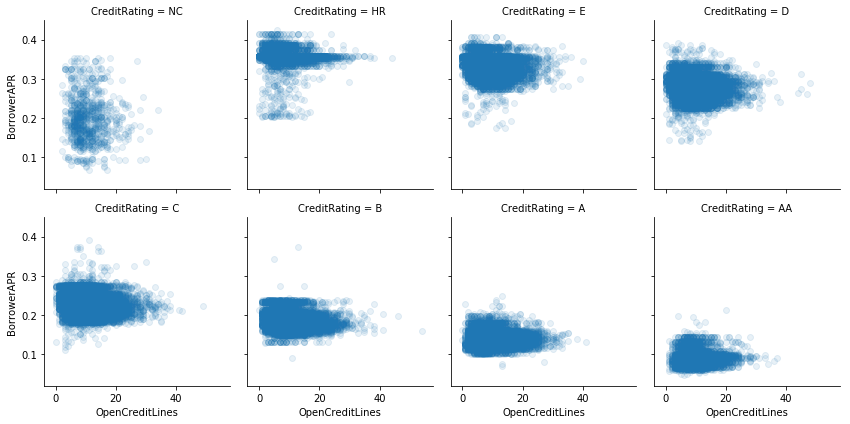

In [438]:
# facet grid for CreditRatings of scatterplots showing OpenCreditLines by BorrowerAPR for post-2009 data
g = sns.FacetGrid(data = prosper_post09, col = 'CreditRating', col_wrap = 4)
g.map(plt.scatter, 'OpenCreditLines', 'BorrowerAPR', alpha = 0.1);

> The shift in the distributions between these two facet grids is interesting because it shows a clear tightening of the distribution of APR's for each CreditRating category. Although the shifts in the distributions are relatively similar going up CreditRatings, there was very likely some shift associated with the change to ProsperRatings where listings were allowed a much narrower range of APR's per CreditRating.

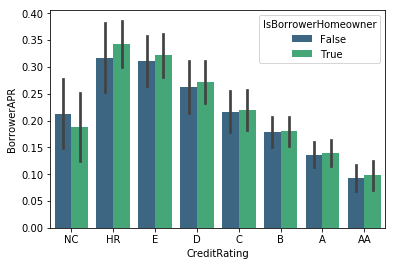

In [407]:
# whiskered, clustered bar chart of BorrowerAPR by CreditRating and IsBorrowerHomeowner
sns.barplot(data = prosper, x = 'CreditRating', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', ci = 'sd', palette = 'viridis');

> The whiskered bar chart interestingly shows that there is a tendancy towards higher APR's for homeowners over non-homeowners across all CreditRatings. This is notable because this suggests a potential higher risk for loans that are being made to homeowners. It would be worth looking more into what these loans are for and what factors go into the setting of the APR.

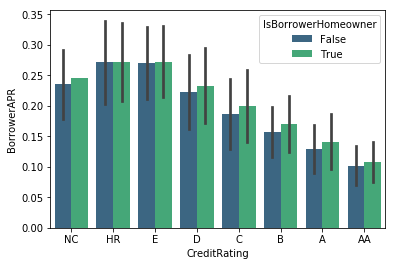

In [409]:
# whiskered, clustered bar chart of BorrowerAPR by CreditRating and IsBorrowerHomeowner for pre-2009 data
sns.barplot(data = prosper_pre09, x = 'CreditRating', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', ci = 'sd', palette = 'viridis');

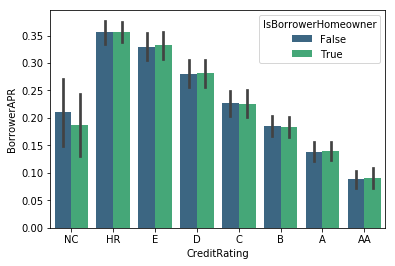

In [410]:
# whiskered, clustered bar chart of BorrowerAPR by CreditRating and IsBorrowerHomeowner for post-2009 data
sns.barplot(data = prosper_post09, x = 'CreditRating', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', ci = 'sd', palette = 'viridis');

> Looking into these two plots of BorrowerAPR for pre and post July 2009 data broken down by CreditRating and IsBorrowerHomeowner, it becomes clear again that there was a clear shift towards a more consistent process of setting APRs after the change to ProsperRatings. The shortening of standard deviation whiskers across all CreditRatings in the post July 2009 data is indicative of this. In addition, after the shift to ProsperRatings there was a raising of the mean APR for high risk and E rated loans. 

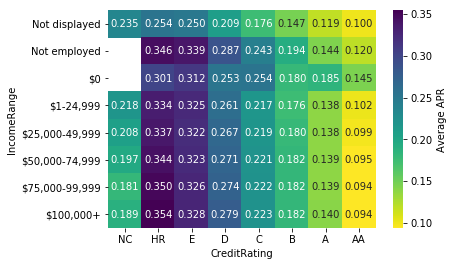

In [391]:
# heatmap of average BorrowerAPR by CreditRating and IncomeRange
cat_means = prosper.groupby(['CreditRating', 'IncomeRange']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'apr_avg')
cat_means = cat_means.pivot(index = 'IncomeRange', columns = 'CreditRating', values = 'apr_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label': 'Average APR'}, cmap = 'viridis_r');

> It is interesting to note that there isn't a significant change in the average APR amongst most income ranges, and that the average APR seems to be mostly determined by the CreditRating. The exception to this seems to be for the \\$0 income rating, which has values that are significantly different from other income levels at every CreditRating. Looking into what makes a person's income get listed at \\$0 rather than not employed could provide some insight into why this is the case, though that is outside of the scope of this project. 

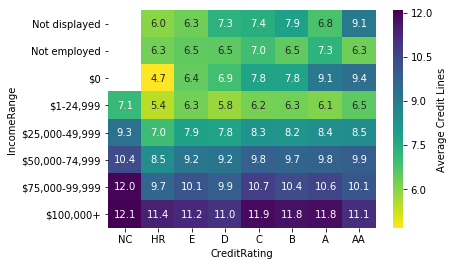

In [403]:
# heatmap of Average OpenCreditLines by CreditRating and IncomeRange
cat_means = prosper.groupby(['CreditRating', 'IncomeRange']).mean()['OpenCreditLines']
cat_means = cat_means.reset_index(name = 'avg_creditlines')
cat_means = cat_means.pivot(index = 'IncomeRange', columns = 'CreditRating', values = 'avg_creditlines')
sns.heatmap(cat_means, annot = True, fmt = '.1f', cbar_kws = {'label': 'Average Credit Lines'}, cmap = 'viridis_r');

> There is generally a positive relationship between the number of credit lines and both IncomeRange and CreditRating. Moving from lower to higher rated CreditRatings shows a higher average number of credit lines, and going from lower to higher incomes also shows a higher average number of credit lines. It's interesting to note that the lowest average number of credit lines is for high risk listings for people in the \\$0 income bracket. Again, looking into what factors go into a person being in this income bracket rather than being labeled not employed or not displayed could provide insight into why this is, however that is outside of the scope of this project.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your features of interest?

> Looking into the differences in facetgrids of scatterplots showing BorrowerAPR by CreditRatings for data pre July 2009 and post July 2009, it was very interesting to see that that there was a notable change in the distribution of APRs across all CreditRatings during this change. As opposed to the CreditGrade listings, the ones with ProsperRatings had much tigher ranges of APRs, suggesting some kind of intentional shift in either the way APRs were set or some change among the type of listing accepted following that shift. 

> There was also a surprising tendancy seen in the whiskered, clustered bar chart of BorrowerAPR broken down by CreditRating and IsBorrowerHomeowner that across all CreditRatings homeowners tended to have slightly higher APRs compared to non-homeowners. This is very interesting because it's plausible to think that homeowners would generally be more financially well-off compared to non-homeowner, and so would be of lower risk for loans, however the opposite appears to be the case, though the difference is slight. There also appears to be a shortening of the standard deviation whiskers for the plots when comparing data from pre July 2009 to post July 2009, indicating again, possibly a more systematized process of setting APRs, with them being more closely tied to the CreditRating than before. Also worth noting was a dramatic rise in the APRs for higher risk loans after July 2009. 

### Were there any interesting or surprising interactions between features?

> The pointplot of BorrowerAPR by CreditRating and LoanStatus was interesting in that, while the AA, A, and E rated listings showed a positive correlation between the number of days the loan was past due and the APR, this trend did not exist in the other credit ratings. This was surprising because it would make sense for loans which were more likely to go past due to have higher APRs relative to other loans within that credit rating, however that does not seem to be the case generally. The two heatmaps, one showing the average number of OpenCreditLines and the other showing the average BorrowerAPR, both broken down by CreditRating and IncomeRange, showed an interesting deviation from the general trends of the plots for the \\$0 income bracket. For average BorrowerAPR, there was generally a correlation between that value and the CreditRating across all income brackets, except for the \\$0 bracket, which for lower rated loans was lower than the trend and for higher rated loans was higher than the trend. In the heatmap for average number of OpenCreditLines, the lowest number was for individuals with high risk loans in the $0 income bracket, and it would be interesting to see what causes this value to be so low compared to people with similarly high risk rated loans who are listed as not employed or not displayed, as they have a significantly higher number of average OpenCreditLines. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report! XXXXXXX

there was an error in creating the CreditRatings column where certain values from the ProsperRatings column couldn't be indexed properly and so were put into CreditRatings as ''. This occured at most about 1,000 times, and likely fewer as there are some rows which had neither a CreditGrade nor Prosper Rating.